#https://www.philippe-fournier-viger.com/spmf/index.php?link=datasets.php

In [1]:
import requests
import numpy as np
import pandas as pd
import io

In [8]:
url_transactions = "https://www.philippe-fournier-viger.com/spmf/datasets/fruithut_original.txt"
url_taxonomy = "https://www.philippe-fournier-viger.com/spmf/datasets/Fruithut_taxonomy_data.txt"

In [9]:
response_transations = requests.get(url_transactions)
transactions_and_elements_txt = response_transations.text

response_taxonomy = requests.get(url_taxonomy)
taxonomy_txt = response_taxonomy.text

In [10]:
df_taxonomy = np.genfromtxt(io.StringIO(taxonomy_txt), delimiter=',')
df_taxonomy = pd.DataFrame(df_taxonomy)
df_taxonomy = df_taxonomy.astype(int)

In [11]:
elements_data = []
skip_first_line = True
last_index = 0
transactions_and_elements_list = transactions_and_elements_txt.split('\n')

for line in transactions_and_elements_list:
    if skip_first_line:
        skip_first_line = False
        continue

    if line.startswith("@ITEM="):
        line = line.replace("@ITEM=", "")
        parts = line.split("=")
        number = int(parts[0])
        description = parts[1].replace('\r', '')
        elements_data.append([number, description])
        last_index += 1
    elif not line.startswith("@ITEM="):
        break

In [12]:
df_elements = np.array(elements_data)
sorted_indices = np.argsort(df_elements[:, 0].astype(int))
df_elements = df_elements[sorted_indices]
transactions_list = transactions_and_elements_list[last_index+1:]

for i in range(len(transactions_list)):
    transactions_list[i] = transactions_list[i].replace('\r', '')

element_numbers = {row[0]: row[1] for row in df_elements}

transactions_data = []
for line in transactions_list:
    transaction = line.split(' ')
    transaction_data = np.array([1 if element in transaction else 0 for element in element_numbers])
    transactions_data.append(transaction_data)

In [13]:
df_transactions = pd.DataFrame(transactions_data, columns=list(element_numbers.keys()))

In [14]:
print("Taxonomy:")
print(df_taxonomy)

Taxonomy:
         0    1
0     1001  110
1     1002  150
2     1003  150
3     1004  150
4     1005  130
...    ...  ...
1290   237  230
1291   210  200
1292   220  200
1293   230  200
1294   240  200

[1295 rows x 2 columns]


In [15]:
print("\n\nElements descriptions:")
print(df_elements)



Elements descriptions:
[['1001' ' Australian Asparagus green']
 ['1002' 'Beans green']
 ['1003' 'Beans baby']
 ...
 ['9996' 'Almond Bread']
 ['9997' 'Chocolate Almond Bread']
 ['9998' 'Chilli Powder Unr 200g']]


In [16]:
print("\n\nTransactions:")
print(df_transactions)



Transactions:
        1001  1002  1003  1004  1005  1007  1008  1009  1010  1011  ...  9989  \
0          0     0     0     0     0     0     0     0     0     0  ...     0   
1          0     0     0     0     0     0     0     0     0     0  ...     0   
2          1     0     0     0     0     0     0     0     0     0  ...     0   
3          1     0     0     0     0     0     0     0     0     0  ...     0   
4          1     0     1     0     0     0     0     0     0     0  ...     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
181966     0     0     0     0     0     0     0     0     0     0  ...     0   
181967     0     0     0     0     0     0     0     0     1     0  ...     0   
181968     0     1     0     0     0     0     1     0     0     0  ...     0   
181969     0     0     0     0     0     0     0     0     0     0  ...     0   
181970     0     0     0     0     0     0     0     0     0     0  ...     0   

        999

In [17]:
df_taxonomy.to_csv('taxonomy.csv', index=False)
df_transactions.to_csv('transactions.csv', index=False)
df_elements.to_csv('elements_names.csv', index=False)

# Analiza zbioru

In [3]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions = df_transactions.head(10000)

In [4]:
column_sums = df_transactions.sum(axis=0)

In [5]:
sorted_column_sums = column_sums.sort_values(ascending=False)

In [6]:
top_10_columns = sorted_column_sums.head(10)

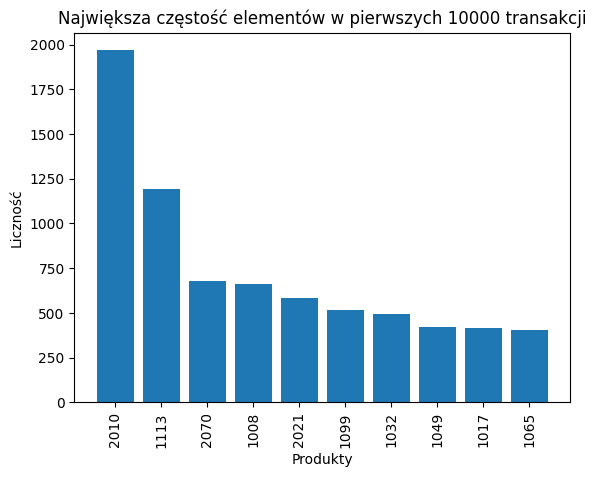

In [8]:
import matplotlib.pyplot as plt

plt.bar(top_10_columns.index, top_10_columns)
plt.xlabel('Produkty')
plt.ylabel('Liczność')
plt.title('Największa częstość elementów w pierwszych 10000 transakcji')
plt.xticks(rotation=90)
plt.show()

In [14]:
correlation_matrix = df_transactions.corr().abs()
n = len(df_transactions.columns)
max_correlations = []
top_n = 10

for _ in range(top_n):
    max_correlation = 0.0
    max_pair = None
    for i in range(n):
        for j in range(i + 1, n):
            if df_transactions.columns[i] != df_transactions.columns[j]:
                correlation = correlation_matrix.iloc[i, j]
                if correlation > max_correlation and correlation not in [corr for _, corr in max_correlations]:
                    max_correlation = correlation
                    max_pair = (df_transactions.columns[i], df_transactions.columns[j])

    if max_pair:
        max_correlations.append((max_pair, max_correlation))

print(f"Najmocniej skorelowane {top_n} par kolumn:")
for pair, correlation in max_correlations:
    print(f"Produkty: {pair}, Korelacja: {correlation}")

Najmocniej skorelowane 10 par kolumn:
Kolumny: ('2080', '4021'), Korelacja: 0.7070714214274961
Kolumny: ('2035', '4001'), Korelacja: 0.5772925255010094
Kolumny: ('1003', '1123'), Korelacja: 0.49989997999600116
Kolumny: ('4070', '7004'), Korelacja: 0.4998999799960003
Kolumny: ('7010', '7012'), Korelacja: 0.4711922985599706
Kolumny: ('2080', '4071'), Korelacja: 0.44712413488784
Kolumny: ('4001', '4015'), Korelacja: 0.4081053683419324
Kolumny: ('4059', '4060'), Korelacja: 0.4079827958094806
Kolumny: ('6015', '6020'), Korelacja: 0.40796237574401184
Kolumny: ('4052', '4065'), Korelacja: 0.37785105531034757


In [17]:
print(f"Najmocniej skorelowane {top_n} par kolumn:")
for pair, correlation in max_correlations:
    correlation_rounded = round(correlation, 3)
    print(f"Produkty: {pair}, Korelacja: {correlation_rounded}")

Najmocniej skorelowane 10 par kolumn:
Produkty: ('2080', '4021'), Korelacja: 0.707
Produkty: ('2035', '4001'), Korelacja: 0.577
Produkty: ('1003', '1123'), Korelacja: 0.5
Produkty: ('4070', '7004'), Korelacja: 0.5
Produkty: ('7010', '7012'), Korelacja: 0.471
Produkty: ('2080', '4071'), Korelacja: 0.447
Produkty: ('4001', '4015'), Korelacja: 0.408
Produkty: ('4059', '4060'), Korelacja: 0.408
Produkty: ('6015', '6020'), Korelacja: 0.408
Produkty: ('4052', '4065'), Korelacja: 0.378
